In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

mpl.style.use('default')

%matplotlib inline


# plt.plot(chart['macd'], '.')
# plt.plot(chart['signal'], '.')


# date = chart.index
# open = chart['open'].tolist()
# high = chart['high'].tolist()
# low = chart['low'].tolist()
# close = chart['close'].tolist()

# ohlc = list(zip(date, open, high, low, close))

# fig = plt.subplot()
# ax1 = plt.subplot()
# candlestick_ohlc(ax1, ohlc, width=0.5, colorup='g', colordown='r', alpha=0.8)


# plt.show()


In [56]:
MIN = 60
HOUR = MIN * 60
DAY = HOUR * 24

start = int(time.time()) - (DAY*28)

data = returnChartData('BTC_XRP', start, '9999999999', 7200)

chart = pd.DataFrame(data)

chart['ema12'] = chart['close'].ewm(span=12,min_periods=0,adjust=True,ignore_na=False).mean()
chart['ema26'] = chart['close'].ewm(span=26,min_periods=0,adjust=True,ignore_na=False).mean()
chart['macd'] = chart['ema12'] - chart['ema26']
chart['signal'] = chart['macd'].ewm(span=9,min_periods=0,adjust=True,ignore_na=False).mean()


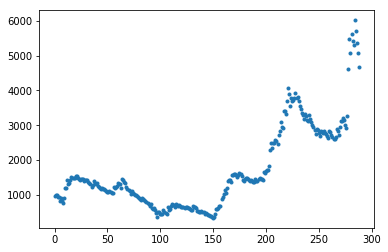

In [39]:
ETH = 1000
BTC = 0
br = 0

track = []

trend = 2

for index, row in chart.iterrows():
    macd = row['macd']
    signal = row['signal']
    rate = row['weightedAverage']
    
    if macd < signal:
        if trend == 1:
            br = ETH * 2
            now = ETH + br
            #track.append(now)
            BTC = (now * rate) * 0.9975
            ETH = 0
        trend = 0
    
    if macd > signal:
        if trend == 0 and BTC != 0:
            amount = (BTC / rate) * 0.9975
            ETH = amount - br
            br = 0
            BTC = 0
            track.append(ETH)
        trend = 1
    
    
        
# print(track)

plt.plot(track, '.')

plt.show()

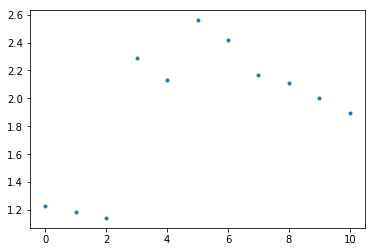

In [57]:
ETH = 0
BTC = 1

track = []

trend = 2

for index, row in chart.iterrows():
    macd = row['macd']
    signal = row['signal']
    rate = row['close']
    
    if macd > signal:
        if trend == 0:
            ETH = (BTC / rate) * 0.9975
            BTC = 0
        trend = 1
    
    if macd < signal:
        if trend == 1 and ETH != 0:
            BTC = (ETH * rate) * 0.9975
            ETH = 0
            track.append(BTC)
        trend = 0
    

# print(track)

plt.plot(track, '.')

plt.show()

In [45]:
chart.tail()

,close,date,high,low,open,quoteVolume,volume,weightedAverage,ema12,ema26,macd,signal
2683,0.090282,1516236300,0.091508,0.088700,0.090301,1719.097551,155.077759,0.090209,0.090627,0.089979,0.000648,0.000883
2684,0.090900,1516237200,0.091358,0.089672,0.090282,1381.514178,125.351320,0.090735,0.090669,0.090047,0.000622,0.000831
2685,0.091311,1516238100,0.091928,0.090035,0.090806,1231.483691,112.342355,0.091225,0.090768,0.090141,0.000627,0.000790
2686,0.091400,1516239000,0.091768,0.090443,0.091311,775.921452,70.730141,0.091156,0.090865,0.090234,0.000631,0.000758
2687,0.091399,1516239900,0.091400,0.090997,0.091400,147.434732,13.447240,0.091208,0.090947,0.090320,0.000627,0.000732
